In [1]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
bikes = pd.read_csv('london_merged.csv')

In [27]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [28]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [29]:
# change column names

new_cols_dict = {
    'timestamp':'time',
    'cnt': 'count',
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

bikes.rename(new_cols_dict, axis=1, inplace=True)

In [30]:
# change humidity values to percentage (0-1)

bikes.humidity_percent = bikes.humidity_percent / 100

In [31]:
# create a season dictionary so that we can map the intergers 0-3 to the actual written values

season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# same with weather dict.
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# change the seasons column data to string
bikes.season = bikes.season.astype('str')
bikes.season = bikes.season.map(season_dict)

bikes.weather = bikes.weather.astype('str')
bikes.weather = bikes.weather.map(weather_dict)

bikes.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


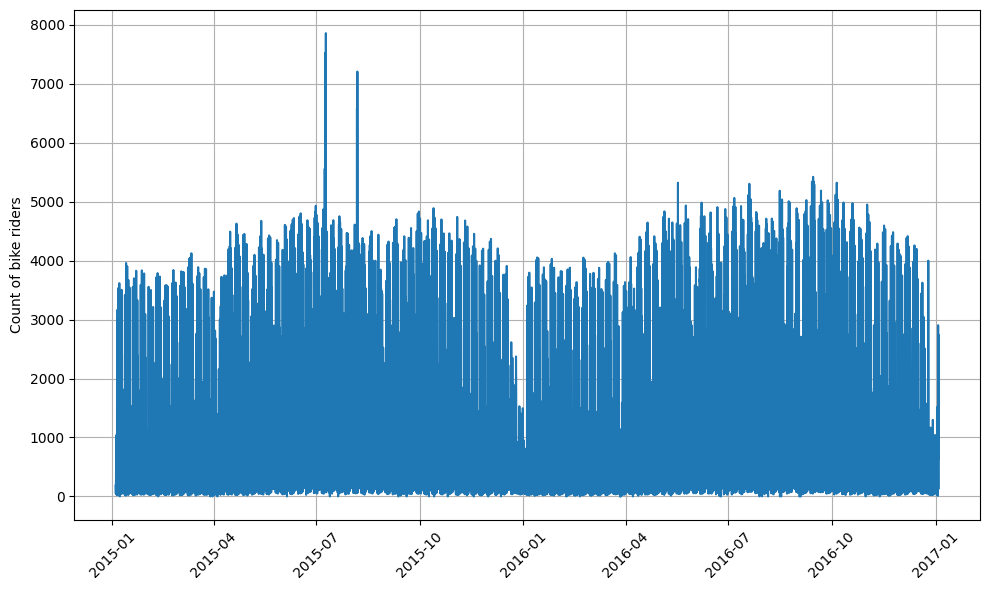

In [42]:
#convert time column to datetime datatype so we can split up the data
bikes['time'] = pd.to_datetime(bikes['time'])
df_hourly = bikes.resample('h', on='time').sum()
count = bikes['count']

plt.figure(figsize=(10,6))
plt.plot(df_hourly.index, df_hourly['count'])
plt.ylabel('Count of bike riders')
plt.xticks(rotation=45)
plt.grid(True) # Add grid lines for better visualization
plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show()

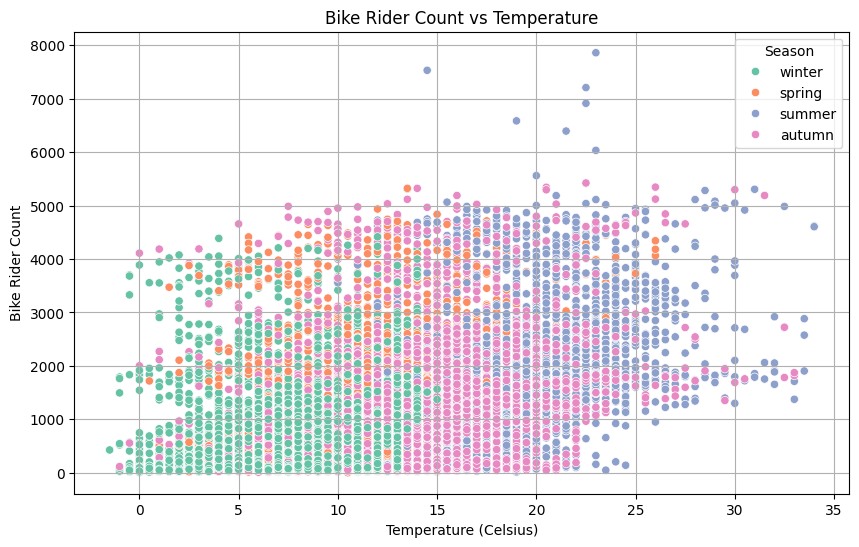

In [43]:
# Visualize temperature and season's effect on number of bike riders

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_real_C', y='count', hue='season', data=bikes, palette='Set2')
plt.title('Bike Rider Count vs Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Bike Rider Count')
plt.legend(title='Season')
plt.grid(True)
plt.show()

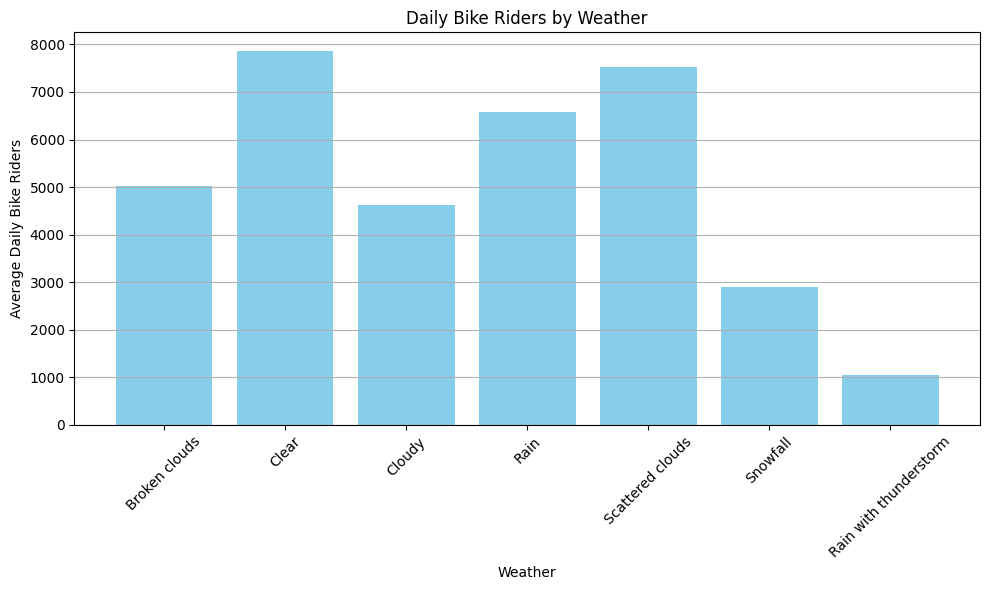

In [37]:
# Weather forecast's effect on bike riders

plt.figure(figsize=(10, 6))
plt.bar(bikes['weather'], bikes['count'], color='skyblue')
plt.title('Daily Bike Riders by Weather')
plt.xlabel('Weather')
plt.ylabel('Average Daily Bike Riders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [10]:
# convert the cleaned data to an excel file which can be used for further visualization and evaluation.

bikes.to_excel('london_bikes_data_final.xlsx', sheet_name='Data')